### Bir restoranın günlük gelirlerini etkileyen faktörler isimli bir veri seti üzerinde karar ağaçları modeli kuracağız.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
data = {
    'Hava Durumu': ['Güneşli', 'Yağmurlu', 'Bulutlu', 'Güneşli', 'Yağmurlu', 'Bulutlu', 'Güneşli'],
    'Masa Sayısı': [50, 30, 40, 45, 35, 55, 60],
    'Reklam Harcamaları': [1000, 500, 800, 1200, 600, 1500, 2000],
    'Günlük Gelir': [5500, 3500, 4500, 6000, 4000, 7000, 8000]
}

data = pd.DataFrame(data)
data.head()

,Hava Durumu,Masa Sayısı,Reklam Harcamaları,Günlük Gelir
0,Güneşli,50,1000,5500
1,Yağmurlu,30,500,3500
2,Bulutlu,40,800,4500
3,Güneşli,45,1200,6000
4,Yağmurlu,35,600,4000


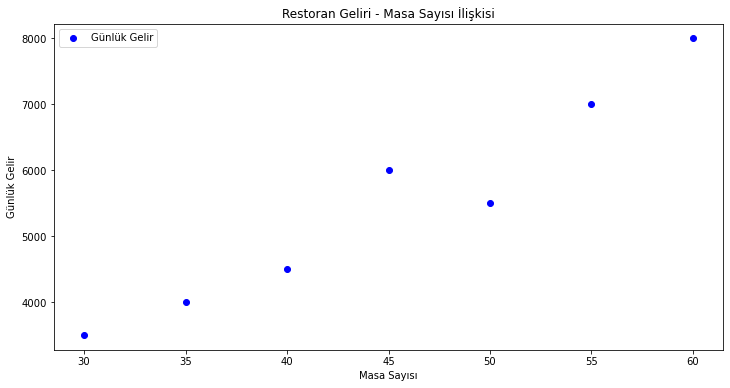

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(data['Masa Sayısı'], data['Günlük Gelir'], color='blue', label='Günlük Gelir')
plt.xlabel('Masa Sayısı')
plt.ylabel('Günlük Gelir')
plt.title('Restoran Geliri - Masa Sayısı İlişkisi')
plt.legend()
plt.show()

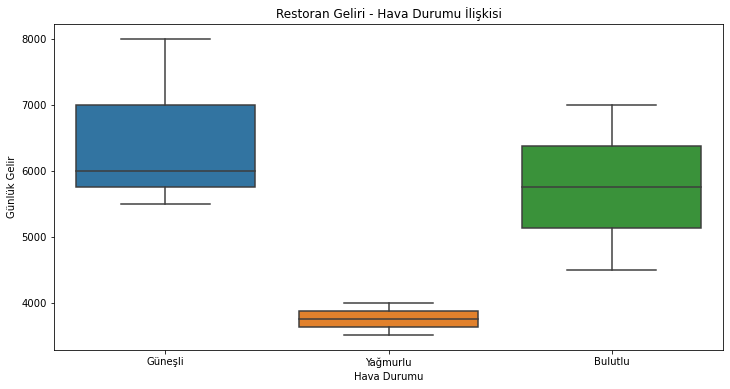

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='Hava Durumu', y='Günlük Gelir')
plt.xlabel('Hava Durumu')
plt.ylabel('Günlük Gelir')
plt.title('Restoran Geliri - Hava Durumu İlişkisi')
plt.show()

In [37]:
data['Hava Durumu'].unique()

array(['Güneşli', 'Yağmurlu', 'Bulutlu'], dtype=object)

In [38]:
# Hava Durumu değişkenini sayısal değişkene çevirdik
data['Hava Durumu'] = data['Hava Durumu'].map({'Güneşli':0, 'Yağmurlu':1, 'Bulutlu':2})

In [39]:
# Bağımlı ve bağımsız değişkenlerimizi oluşturalım.
X = data.drop(['Hava Durumu', 'Günlük Gelir'], axis=1)
y = data['Günlük Gelir']

In [40]:
# eğitim ve test setlerimizi ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Modeli oluşturalım ve eğitelim.
model = DecisionTreeRegressor().fit(X_train, y_train)

In [42]:
# Tahmin Yapalım.
y_pred = model.predict(X_test)

In [43]:
# Modeli Değerlendirelim.
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R^2: ', r2)
print('MSE: ', mse)
print('RMSE: ', rmse)

R^2:  0.375
MSE:  625000.0
RMSE:  790.5694150420949


### Kategorik Hava Durumu değişkenini sayısal değişkene çevirip bağımsız değişkenlere eklediğimde, kök ortalama kare hata değeri 780'lerde çıkıyor. Fakat Hava Durumu değişkenini bağımsız değişkenlerden çıkarttığımda bu değer 500'lere düşüyor. Bu yüzden hava durumu değişkenini çıkartıp modeli öyle kurdum.  Belki kategorik değişkeni sayısal değişkene çevirdikten sonra standartlaştırma işlemi yapmamız gerekiyordur. 

# Model Tuning 

In [44]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [45]:
import warnings
warnings.filterwarnings('ignore')
params = {
    'max_depth': range(3, 10),
    'min_samples_split': range(3, 10),
    'min_samples_leaf': range(1, 13)
}

grid = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_

print('Best Parameters: ', best_params)

Best Parameters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}


## Model Tuning işlemi sonucunda elde ettiğimiz hiperparametreleri kullanarak yeni modelimizi oluşturalım.

In [46]:
model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, min_samples_split=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=3)

In [47]:
y_pred = model.predict(X_test)

In [48]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R^2: ', r2)
print('MSE: ', mse)
print('RMSE: ', rmse)

R^2:  0.59375
MSE:  406250.0
RMSE:  637.3774391990981


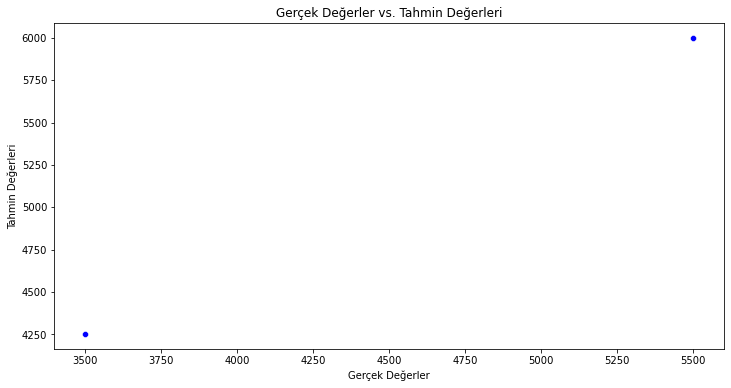

In [49]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Gerçek Değerler vs. Tahmin Değerleri')
plt.show()

# Tahmin

In [70]:
masa_sayisi = int(input('Lütfen Masa Sayısı Giriniz: '))
reklam_harcamalari = int(input('Lütfen Reklam Harcamalarınızı Giriniz: '))

inputt = np.array([[masa_sayisi, reklam_harcamalari]])
input_pred = model.predict(inputt)

print('Tahmini Gelir: ', float(input_pred))

Lütfen Masa Sayısı Giriniz:  55
Lütfen Reklam Harcamalarınızı Giriniz:  1000


Tahmini Gelir:  7500.0
